In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit_optimization.applications import Maxcut, Tsp
from qiskit_algorithms import SamplingVQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_optimization.algorithms import MinimumEigenOptimizer

In [2]:
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=500, alpha=0.8, ax=default_axes, pos=pos)

In [12]:
locations = {
    0: {"name": "Deggendorf Central Station", "pos": (48.8369, 12.9613)},
    1: {"name": "Stadtpark", "pos": (48.8315, 12.9632)},
    2: {"name": "Stadthalle", "pos": (48.8344, 12.9661)},

}

distance_matrix = np.array([
    [0, 1.3, 0.9],
    [1.3, 0, 0.6],
    [0.9, 0.6, 0],
])

n = len(locations)
K = 2


distance
 [[0.  1.3 0.9]
 [1.3 0.  0.6]
 [0.9 0.6 0. ]]


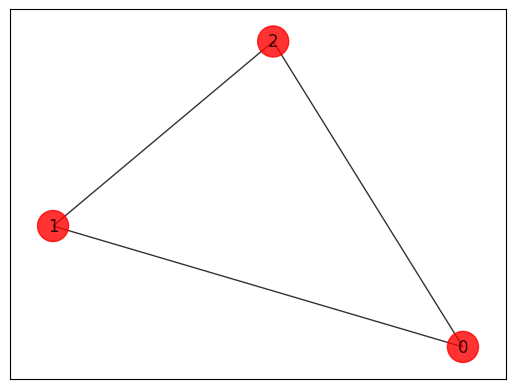

In [ ]:
# Create a graph from the locations dataset
G = nx.Graph()

for loc_id, loc_data in locations.items():
    G.add_node(loc_id, pos=loc_data["pos"])

# Add edges with distances as weights
for i in range(len(locations)):
    for j in range(i + 1, len(locations)):
        distance = distance_matrix[i, j]
        G.add_edge(i, j, weight=distance)

# Extract adjacency matrix
adj_matrix = nx.to_numpy_array(G)
print("distance\n", adj_matrix)

# Define colors and positions for the graph
colors = ["r" for node in G.nodes]
pos = nx.get_node_attributes(G, "pos")
draw_graph(G, colors, pos)

In [17]:
cost_matrix = adj_matrix.copy()
np.fill_diagonal(cost_matrix, np.inf)
print("Cost Matrix:\n", cost_matrix)

Cost Matrix:
 [[inf 1.3 0.9]
 [1.3 inf 0.6]
 [0.9 0.6 inf]]


In [19]:
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

Problem name: TSP

Minimize
  48*x_0_0*x_1_1 + 48*x_0_0*x_1_4 + 91*x_0_0*x_2_1 + 91*x_0_0*x_2_4
  + 33*x_0_0*x_3_1 + 33*x_0_0*x_3_4 + 85*x_0_0*x_4_1 + 85*x_0_0*x_4_4
  + 48*x_0_1*x_1_0 + 48*x_0_1*x_1_2 + 91*x_0_1*x_2_0 + 91*x_0_1*x_2_2
  + 33*x_0_1*x_3_0 + 33*x_0_1*x_3_2 + 85*x_0_1*x_4_0 + 85*x_0_1*x_4_2
  + 48*x_0_2*x_1_1 + 48*x_0_2*x_1_3 + 91*x_0_2*x_2_1 + 91*x_0_2*x_2_3
  + 33*x_0_2*x_3_1 + 33*x_0_2*x_3_3 + 85*x_0_2*x_4_1 + 85*x_0_2*x_4_3
  + 48*x_0_3*x_1_2 + 48*x_0_3*x_1_4 + 91*x_0_3*x_2_2 + 91*x_0_3*x_2_4
  + 33*x_0_3*x_3_2 + 33*x_0_3*x_3_4 + 85*x_0_3*x_4_2 + 85*x_0_3*x_4_4
  + 48*x_0_4*x_1_0 + 48*x_0_4*x_1_3 + 91*x_0_4*x_2_0 + 91*x_0_4*x_2_3
  + 33*x_0_4*x_3_0 + 33*x_0_4*x_3_3 + 85*x_0_4*x_4_0 + 85*x_0_4*x_4_3
  + 63*x_1_0*x_2_1 + 63*x_1_0*x_2_4 + 71*x_1_0*x_3_1 + 71*x_1_0*x_3_4
  + 93*x_1_0*x_4_1 + 93*x_1_0*x_4_4 + 63*x_1_1*x_2_0 + 63*x_1_1*x_2_2
  + 71*x_1_1*x_3_0 + 71*x_1_1*x_3_2 + 93*x_1_1*x_4_0 + 93*x_1_1*x_4_2
  + 63*x_1_2*x_2_1 + 63*x_1_2*x_2_3 + 71*x_1_2*x_3_1 + 71*x_1_2*

In [20]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import (
    Collect2qBlocks,
    ConsolidateBlocks,
    UnitarySynthesis,
)
 
basis_gates = ["rx", "ry", "rxx"]
translate = PassManager(
    [
        Collect2qBlocks(),
        ConsolidateBlocks(basis_gates=basis_gates),
        UnitarySynthesis(basis_gates),
    ]
)

In [22]:
from qiskit import QuantumRegister, QuantumCircuit
 
qubits = QuantumRegister(2, name="q")
circuit = QuantumCircuit(qubits)
 
a, b = qubits
circuit.h(a)
circuit.cx(a, b)
circuit.cx(b, a)
 
circuit.draw()

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ X ├
     └───┘┌─┴─┐└─┬─┘
q_1: ─────┤ X ├──■──
          └───┘

In [25]:
translated = translate.run(circuit)
translated.draw()

global phase: π/2
     ┌─────────┐ ┌─────────┐┌───────────┐┌───────────┐┌──────────┐┌─────────┐»
q_0: ┤ Rx(π/2) ├─┤ Ry(π/2) ├┤ Rx(-3π/4) ├┤0          ├┤ Rx(3π/4) ├┤ Ry(π/2) ├»
     ├─────────┴┐├─────────┤└┬─────────┬┘│  Rxx(π/2) │├──────────┤├─────────┤»
q_1: ┤ Rx(-π/2) ├┤ Ry(π/2) ├─┤ Rx(π/4) ├─┤1          ├┤ Rx(-π/4) ├┤ Ry(π/2) ├»
     └──────────┘└─────────┘ └─────────┘ └───────────┘└──────────┘└─────────┘»
«     ┌───────────┐┌───────────┐┌──────────┐┌─────────┐┌─────────┐ 
«q_0: ┤ Rx(-3π/4) ├┤0          ├┤ Rx(3π/4) ├┤ Ry(π/2) ├┤ Rx(π/2) ├─
«     ├───────────┤│  Rxx(π/2) │├─────────┬┘├─────────┤├─────────┴┐
«q_1: ┤ Rx(-3π/4) ├┤1          ├┤ Rx(π/4) ├─┤ Ry(π/2) ├┤ Rx(-π/2) ├
«     └───────────┘└───────────┘└─────────┘ └─────────┘└──────────┘

In [ ]:
#Pauli Twirling

In [ ]:
from qiskit.providers.fake_provider import FakeJakarta

noisy_backend = FakeJakarta()
target = noisy_backend.target
num_qubits = noisy_backend.num_qubits
cmap = noisy_backend.coupling_map

combined_error = [0.0] * num_qubits
for i in range(num_qubits):
    combined_error[i] = Noise_dict.get(str(i), 0.0)

sorted_qubits = sorted(range(num_qubits), key=lambda i: combined_error[i])
required_logical_qubits = circuit.num_qubits
good_qubits = sorted_qubits[:required_logical_qubits]

In [ ]:
from qiskit.transpiler import CouplingMap
from qiskit.transpiler.layout import Layout

filtered_edges = [[a, b] for [a, b] in cmap if a in good_qubits and b in good_qubits]
filtered_coupling = CouplingMap(filtered_edges)

logical_to_physical = {circuit.qubits[i]: good_qubits[i] for i in range(required_logical_qubits)}
custom_layout = Layout(logical_to_physical)

In [ ]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import (
    ApplyLayout, StochasticSwap, Optimize1qGates,
    CXCancellation, PauliTwirling, DynamicalDecoupling
)
from qiskit.circuit.library import XGate

durations = target.durations()
dd_sequence = [XGate(), XGate()]

custom_pm = PassManager([
    ApplyLayout(custom_layout),
    StochasticSwap(coupling_map=filtered_coupling),
    Optimize1qGates(),
    CXCancellation(),
    PauliTwirling(),
    DynamicalDecoupling(dd_sequence, filtered_coupling, durations)
])

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import execute

# Transpile
transpiled_qaoa = custom_pm.run(circuit)